In [10]:
'''
Project:    Portfolio Risk Analysis
Objective:  Complete all the steps below and return the risk analysis for seven stock
            porfolio against ETFs
Author:     Jose Aponte
Class:      ECO 41552 - Quantitative Finance
'''

'\nProject:    Portfolio Risk Analysis\nObjective:  Complete all the steps below and return the risk analysis for seven stock\n            porfolio against ETFs\nAuthor:     Jose Aponte\nClass:      ECO 41552 - Quantitative Finance\n'

In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
#################### Tickers ####################
"""""
These stocks were chosen by weight from S&P500
AAPL =  Apple Inc
MSFT =  Microsoft Corporation
AMAZN = Amazon.com Inc
TSLA =  Tesla Inc
GOOGL = Alphabet Inc. Class A
UNH =   UnitedHealth Group Incorporate
JNJ =   Johnson and Johnson
"""""
tickers = ['AAPL','MSFT','AMZN','TSLA','GOOGL','UNH','JNJ']
#################### Exchange Traded Fund ####################
"""
SPY =   SPDR S&P 500 ETF Trust
IWM =   iShares Russell 2000 ETF
DIA =   SPDR Dow Jones Industrial Average ETF Trust
"""
etf = ['SPY','IWM','DIA']
dataFinance = yf.download(tickers+etf, period= ' 10y')
dataFinance = dataFinance['Adj Close']
dataFinance.head()


#################### Portfolio Weight Calculator ####################
dataFinance['Portfolio'] = dataFinance[tickers].mean(axis=1)
returns = dataFinance.pct_change()
table = pd.DataFrame(index=tickers)
table['Portfolio Weight [%]'] = (format((1/len(tickers))*100,'.2f'))

########## Annualized Volatility ##########
# Number 63 means 63-days ~ 3-month back until today 
volatilityTrailing3Month = returns[-63:].dropna()
table['Annualized Volatility (Trailing 3-months)'] = (((volatilityTrailing3Month.var()/volatilityTrailing3Month.std())**(1/np.sqrt(4)))*100)

#################### Beta against ETF ####################
# Number 252 means 252-days ~ 12-month back until today
beta = returns[-252:].cov()/returns[-252:].var()
for eachItem in etf:
    table['Beta Against '+eachItem]=beta[eachItem]

#################### Drawdown Calculation ####################
drawdown = (returns[-252:].rolling(5).min()-returns[-252:].rolling(5).max())/returns[-252:].rolling(5).max()
table['Average Weekly Drawdown'] = drawdown.mean()
table['Maximum Weekly Drawdown'] = drawdown.max()

######## Total Return and Annualized Total Return (using trailing 10-years) ###########

table['TotalReturn']=dataFinance.pct_change(len(dataFinance)-1)[-1:].T
table['Annualized Total Returns']=table.TotalReturn**(1/np.sqrt(252))

table.T


[*********************100%***********************]  10 of 10 completed


,AAPL,MSFT,AMZN,TSLA,GOOGL,UNH,JNJ
Portfolio Weight [%],14.29,14.29,14.29,14.29,14.29,14.29,14.29
Annualized Volatility (Trailing 3-months),13.982169,13.922798,16.698251,17.996776,15.078384,11.905875,10.272818
Beta Against SPY,1.22972,1.204965,1.610287,1.823977,1.305359,0.642829,0.291
Beta Against IWM,0.881728,0.83508,1.199595,1.522787,0.917186,0.398439,0.122997
Beta Against DIA,1.363637,1.308704,1.726986,1.79599,1.412364,0.84902,0.440782
Average Weekly Drawdown,-2.094913,-2.695065,-1.328757,-3.505494,-3.227105,-3.865051,-2.10187
Maximum Weekly Drawdown,21.66598,39.14708,415.16831,6.799648,14.960796,3.289653,88.421339
TotalReturn,6.441193,9.104295,8.287424,121.117948,4.347755,9.520023,2.068387
Annualized Total Returns,1.124502,1.149283,1.142497,1.352788,1.097001,1.15252,1.046846


In [13]:
# 2 Porftolio Risk Againust three ETFs

########## Correlation against ETF ##########
tableETF = pd.DataFrame(index=etf)
tableETF['Correlation']=returns[etf+['Portfolio']].corr().Portfolio

########## Covariance of Portfolio against ETF ##########
tableETF['Covariance']=returns[etf+['Portfolio']].cov().Portfolio*10000

########## Tracking Errors (Using trailing 10-years) ##########
for eachItem in etf:
    tableETF.loc[eachItem, 'TrackingError'] = (returns[eachItem]-returns.Portfolio).std()*100

########## Sharpe Ratio (using current risk-free rate) ##########
excessReturn = (returns.Portfolio[-252:]-(0.02/np.sqrt(252)))
tableETF['Sharpe'] = 0
for eachItem in etf:
    tableETF.loc[eachItem, 'Sharpe'] = (excessReturn/(returns[-252:].Portfolio - returns[-252:][eachItem]).std())[-1]

### Annualized Volatility (252 days) Spread (Portfolio Volatility - ETF Volatility) ###
tableETF['VolatilitySpread'] = returns[etf+['Portfolio']][-252:].std() ** (1/252)
tableETF.T


,SPY,IWM,DIA
Correlation,0.886077,0.726442,0.833001
Covariance,1.201928,1.232952,1.135288
TrackingError,0.584813,0.967752,0.697364
Sharpe,-1.771322,-1.181664,-1.334601
VolatilitySpread,0.983200,0.983937,0.982478


<function matplotlib.pyplot.show(close=None, block=None)>

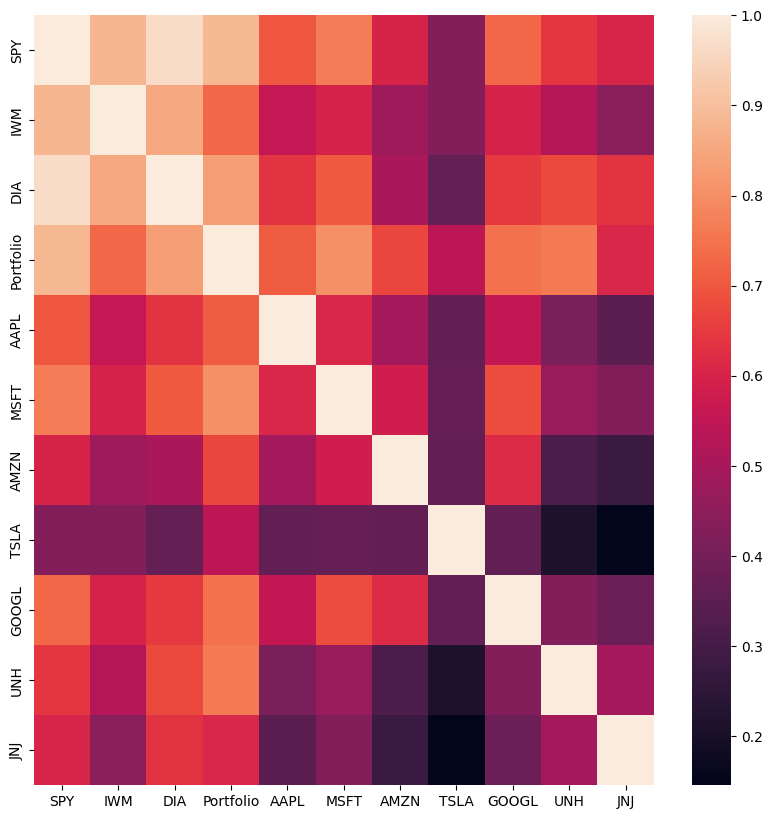

In [14]:
# 3. Correlation Matrix

# A correlation matrix is a heatmap

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(returns[etf+['Portfolio']+tickers].corr())
plt.show
